## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from mpl_toolkits import mplot3d

## Importing Dataset

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.drop('Serial No.', axis=1, inplace=True) # dropping the serial no. column as it is of no use
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2  

## Performing EDA

In [3]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Creating Histogram of all columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0EE9733D0>,
      dtype=object)

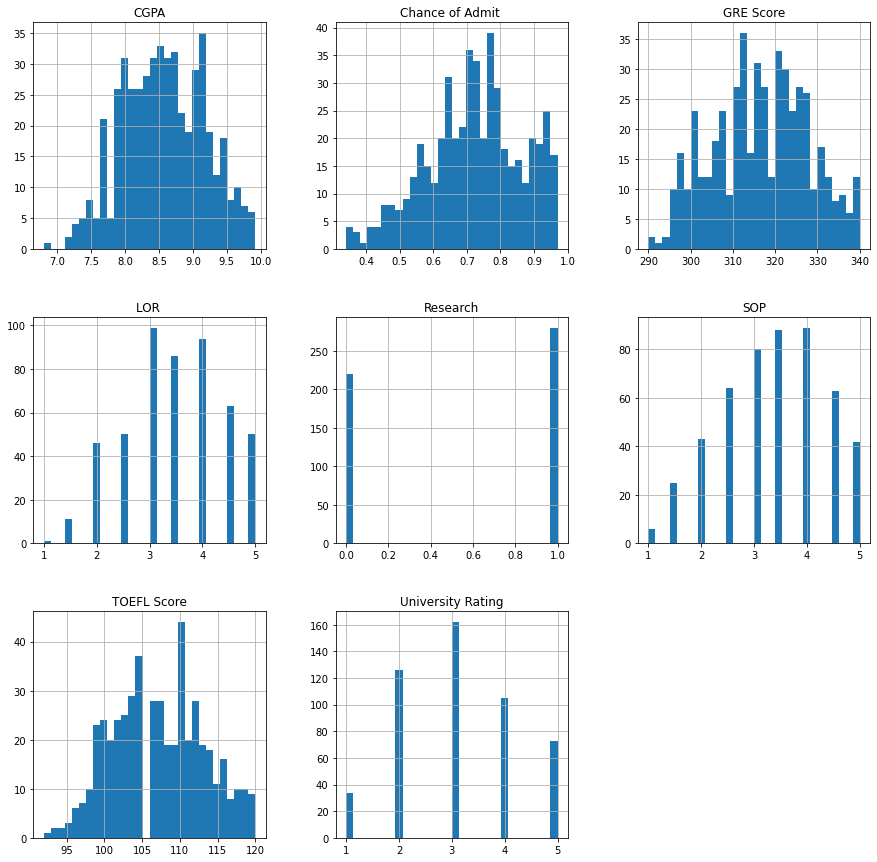

In [5]:
df.hist(bins=30, figsize=(15,15))

### Creating correlation graphs for all the columns

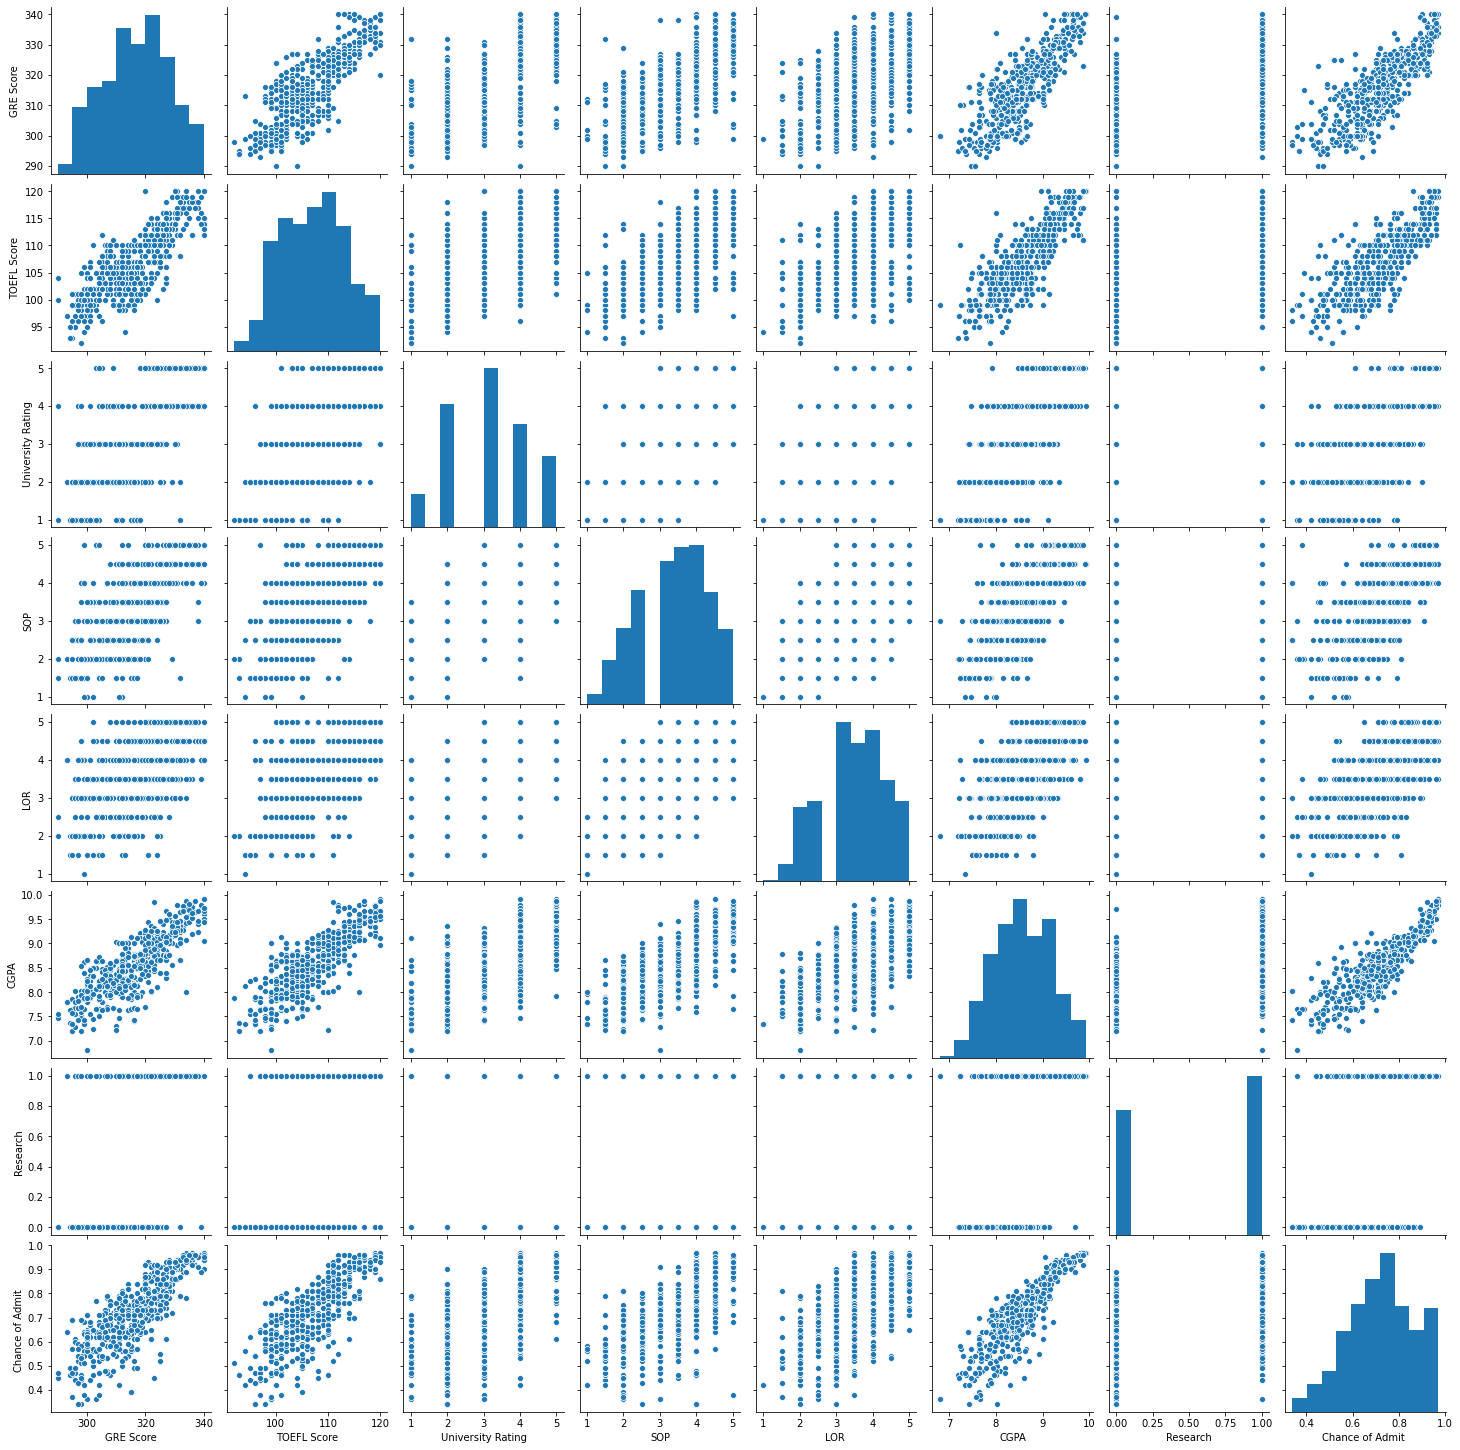

In [6]:
sbn.pairplot(df) 

### Creating corelation Matrix

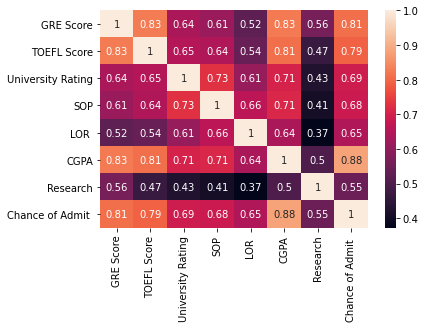

In [7]:
corr_matrix = df.corr()
sbn.heatmap(corr_matrix, annot= True)

## Data Preprocessing

### Extracting X and Y

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Performing Feature Scaling

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)

# 1.  MLR Model

### Adding a constant column in x

In [10]:
x_new = np.append(arr = np.ones((500,1)).astype(int), values = x, axis = 1)

### Applying Backward Elimination

In [11]:
x_opt = np.array(x_new,dtype = float)
col = len(x_opt[1,:])
SL = 0.05
for i in range (0,col) :
    mlr = sm.OLS(endog = y , exog = x_opt).fit()
    max_p = max(mlr.pvalues)
    if max_p > SL :
        for j in range (0,col-i) :
            if max_p == mlr.pvalues[j] :
                x_opt = np.delete(x_opt,j,1)    
    print(mlr.summary())
print(x_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          8.21e-180
Time:                        15:14:25   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    269.039      0.0

### Spliting the Data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_opt, y, test_size=0.15, random_state=17)

## Creating and Training the Model

In [13]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

### Predicting the values

In [14]:
y_pred = mlr.predict(x_test)

### Calculating MSE, RMSE and R2 Score

In [15]:
mse = met.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = met.r2_score(y_test,y_pred)
mlr = [mse,rmse,r2_score]
print('MSE =',mse)
print('RMSE =',rmse)
print('R2 Score =',r2_score)

MSE = 0.0025427965133093715
RMSE = 0.05042614910251795
R2 Score = 0.9081445774040121


## Graph between Y Test and Y Predicted Values

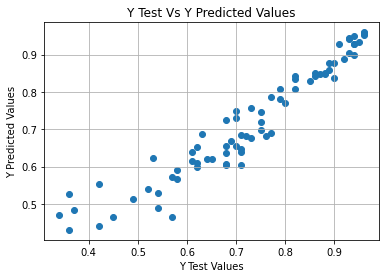

In [16]:
plt.figure(1)
plt.scatter(y_test, y_pred)
plt.grid()
plt.title('Y Test Vs Y Predicted Values')
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

### For a model to be perfect, all the points would align in a straight line for the Graph of Y-Test vs Y-Predicted values. The MLR Model is predicting the values with an accuracy of 90.8%.

# 2. RFR Model

### Spliting the Data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15, random_state=17)

## Creating and Training the Model

In [18]:
rfr = RandomForestRegressor(n_estimators=14, random_state=72)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=14, random_state=72)

### Predicting the values

In [19]:
y_pred = rfr.predict(x_test)

### Calculating MSE, RMSE and R2 Score

In [20]:
mse = met.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = met.r2_score(y_test,y_pred)
rfr = [mse,rmse,r2_score]
print('MSE =',mse)
print('RMSE =',rmse)
print('R2 Score =',r2_score)

MSE = 0.0022003809523809524
RMSE = 0.04690821838847594
R2 Score = 0.9205139218985062


## Graph between Y Test and Y Predicted Values

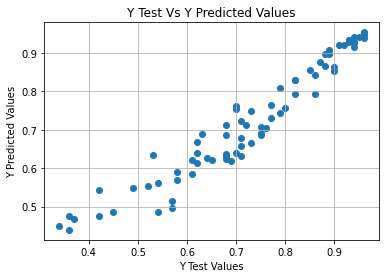

In [21]:
plt.figure(2)
plt.scatter(y_test, y_pred)
plt.grid()
plt.title('Y Test Vs Y Predicted Values')
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

### For a model to be perfect, all the points would align in a straight line for the Graph of Y-Test vs Y-Predicted values. The RFR Model is predicting the values with an accuracy of 92.05%

## Performing PCA

### Visualising the graph to predict sufficient no. of components in PCA

[0.67519343 0.78115789 0.86139044 0.91572834 0.95339642 0.97886487
 1.        ]


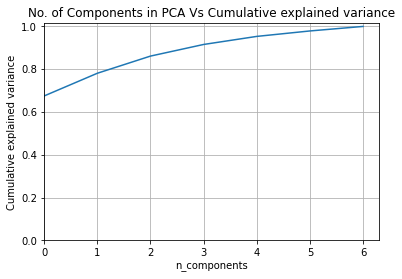

In [22]:
pc = PCA().fit(x)
plt.figure(3)
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.title('No. of Components in PCA Vs Cumulative explained variance')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
print(np.cumsum(pc.explained_variance_ratio_))

### From the above graph we can infer that index 1 of n_components i.e. n_components = 2 gives us about 78% of information of the dataset.

## Performing PCA with n_components = 2

In [23]:
pc = PCA(n_components=2)
x_pca = pc.fit_transform(x)
var = pc.explained_variance_ratio_
print(var)

[0.67519343 0.10596446]


### HeatMap showing significance of features in each Principal Component

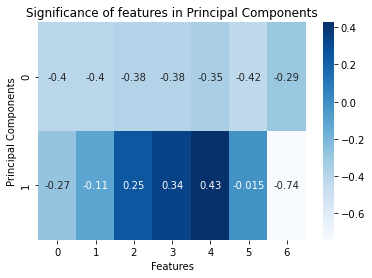

In [24]:
m = pd.DataFrame(pc.components_)
sbn.heatmap(m,cmap='Blues',annot=True)
plt.title('Significance of features in Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# 3. MLR with PCA Model

### Spliting the Data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.15,random_state=17)

## Creating and Training the Model

In [26]:
mlr_pca = LinearRegression()
mlr_pca.fit(x_train,y_train)

LinearRegression()

### Predicting the values 

In [27]:
y__pred = mlr_pca.predict(x_test) 

### Calculating MSE, RMSE and R2 Score

In [28]:
mse = met.mean_squared_error(y_test,y__pred)
rmse = np.sqrt(mse)
r2_score = met.r2_score(y_test,y__pred)
mlr_pca = [mse,rmse,r2_score]
print('MSE =',mse)
print('RMSE =',rmse)
print('R2 Score =',r2_score)

MSE = 0.0030016791912466584
RMSE = 0.054787582454846995
R2 Score = 0.8915680003624422


## Graph between Y Test and Y Predicted Values

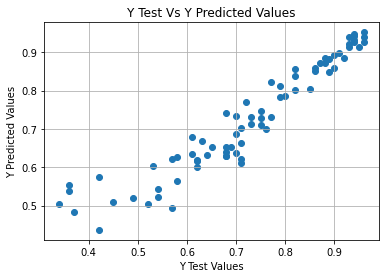

In [29]:
plt.figure(4)
plt.scatter(y_test, y__pred)
plt.grid()
plt.title('Y Test Vs Y Predicted Values')
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

### For a model to be perfect, all the points would align in a straight line for the Graph of Y-Test vs Y-Predicted values. In this graph we can see a linear trend 

## 3D Graph between PCA Components and Output(Y_Pred) 

<IPython.core.display.Javascript object>


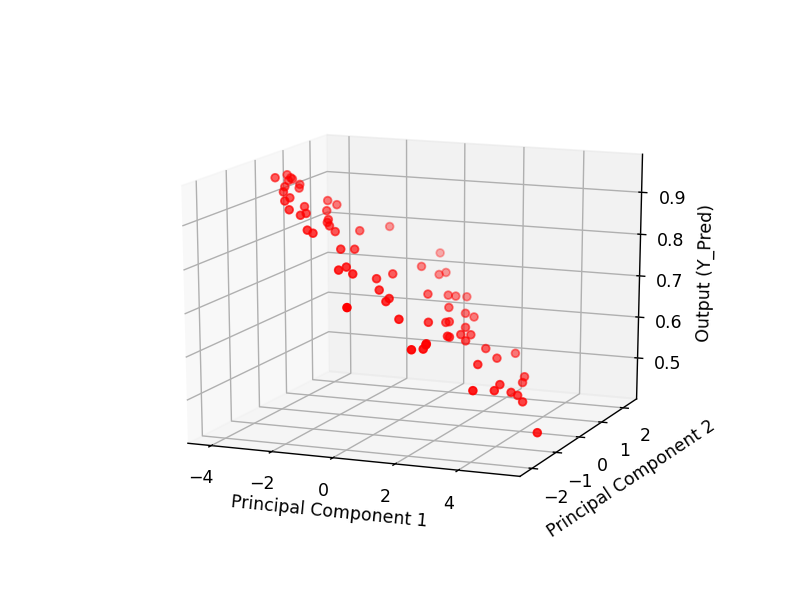

In [41]:
%matplotlib notebook
ax = plt.figure(5).add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y__pred,c='red')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Output (Y_Pred)')
plt.show()

### Here we can see that we have achived 89.15% accuracy in MLR with PCA Model

# 4. RFR with PCA Model

### Splitting the Data

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.15,random_state = 17)

## Creating and Training Random Forest Regressor(RFR)

In [32]:
rfr__pca = RandomForestRegressor(n_estimators=10,random_state=18,max_features='auto')
rfr__pca.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=18)

### As we know that Random Forest is made of decision trees, we can get information about every decision tree by using the following lines of code

<IPython.core.display.Javascript object>


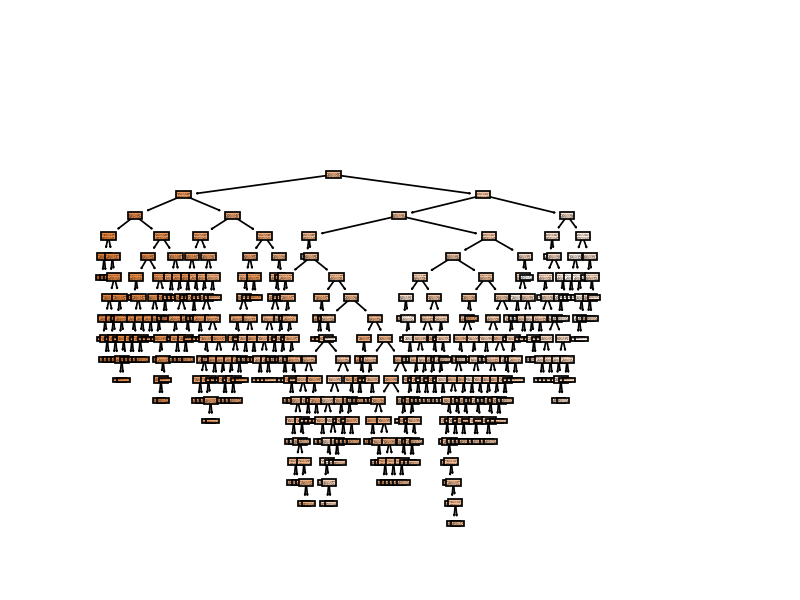

[Text(233.40366210937503, 359.3333333333333, 'X[0] <= -0.925\nmse = 0.019\nsamples = 271\nvalue = 0.728'),
 Text(83.7, 338.79999999999995, 'X[0] <= -2.308\nmse = 0.005\nsamples = 102\nvalue = 0.862'),
 Text(35.00416666666667, 318.26666666666665, 'X[0] <= -3.377\nmse = 0.001\nsamples = 52\nvalue = 0.914'),
 Text(8.266666666666667, 297.7333333333333, 'X[0] <= -4.196\nmse = 0.0\nsamples = 19\nvalue = 0.945'),
 Text(4.133333333333334, 277.2, 'X[1] <= 0.066\nmse = 0.0\nsamples = 2\nvalue = 0.968'),
 Text(2.066666666666667, 256.66666666666663, 'mse = -0.0\nsamples = 1\nvalue = 0.97'),
 Text(6.200000000000001, 256.66666666666663, 'mse = -0.0\nsamples = 1\nvalue = 0.96'),
 Text(12.400000000000002, 277.2, 'X[1] <= -0.647\nmse = 0.0\nsamples = 17\nvalue = 0.943'),
 Text(10.333333333333334, 256.66666666666663, 'mse = 0.0\nsamples = 1\nvalue = 0.97'),
 Text(14.466666666666669, 256.66666666666663, 'X[1] <= 0.133\nmse = 0.0\nsamples = 16\nvalue = 0.941'),
 Text(9.3, 236.13333333333333, 'X[1] <= -0.0

In [40]:
#GIVES INFORMATION ABOUT DECISION TREES
rfr__pca.estimators_
#SHOWS THE DECISION TREE OF A PARTICULAR ESTIMATOR BASED ON INDEX
plt.figure(6)
tree.plot_tree(rfr__pca.estimators_[9],filled='True')
#Here  we plotted Decision Tree indexed 9

### Predicting the values  

In [34]:
y_pred = rfr__pca.predict(x_test)

### Calculating MSE,RMSE,r2_score

In [35]:
mse = met.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = met.r2_score(y_test,y_pred)
rfr_pca = [mse,rmse,r2_score]
print('MSE =',mse)
print('RMSE =',rmse)
print('R2 Score =',r2_score)

MSE = 0.004316053333333332
RMSE = 0.06569667672975044
R2 Score = 0.8440878376208782


## Graph between Y Test and Y Predicted Values

<IPython.core.display.Javascript object>


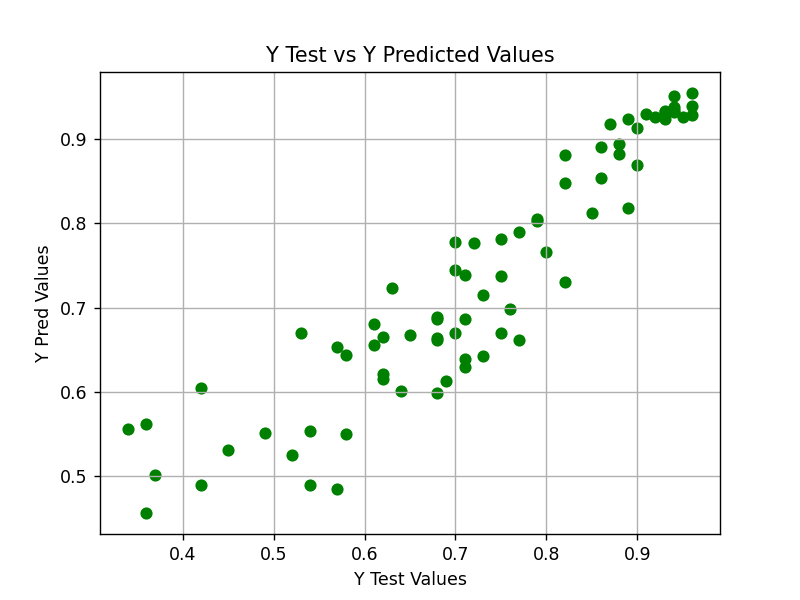

In [39]:
plt.figure(7)
plt.scatter(y_test,y_pred,color = 'Green')
plt.grid()
plt.title('Y Test vs Y Predicted Values')
plt.xlabel('Y Test Values')
plt.ylabel('Y Pred Values')
plt.show()

## 3D Graph between PCA Components and Output(Y_Pred) 

<IPython.core.display.Javascript object>


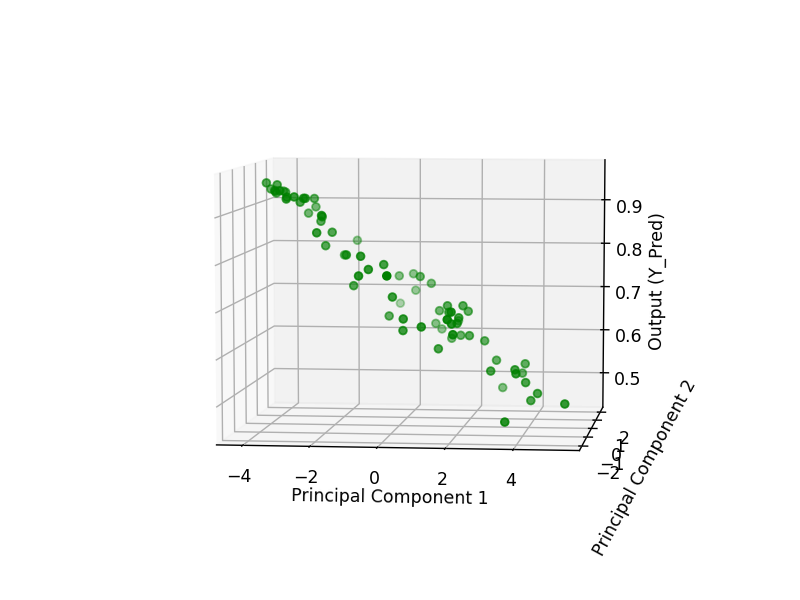

Text(0.5, 0, 'Output (Y_Pred)')

In [37]:
%matplotlib notebook
ax = plt.figure(8).add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_pred,color='green')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Output (Y_Pred)')

### Here we can see that we have achived 84.4% accuracy in RFR with PCA Model

# Comparing all the four models on the basis of minimum MSE and RMSE and maximum r2_score

## Creating Grouped bar chart to determine the best model

<IPython.core.display.Javascript object>


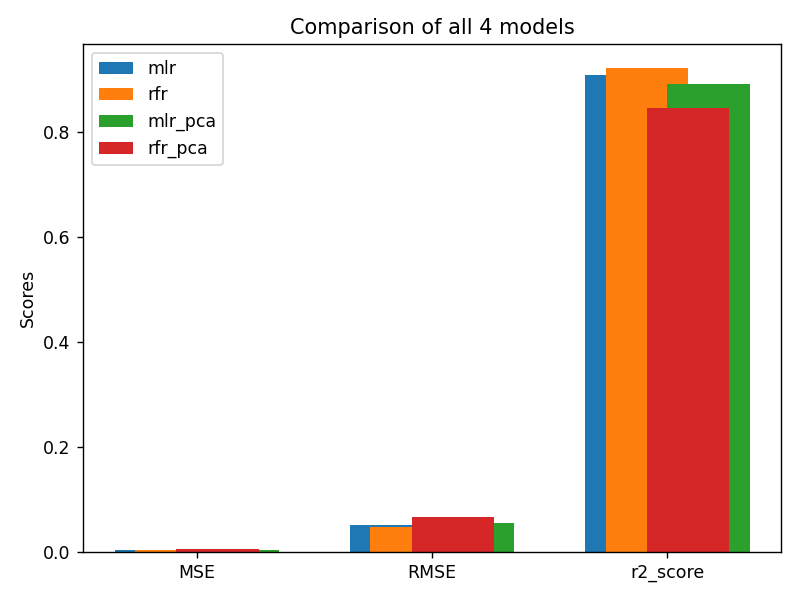

In [38]:
labels = ['MSE', 'RMSE', 'r2_score']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mlr, width, label='mlr')
rects2 = ax.bar(x - width/4, rfr, width, label='rfr')
rects3 = ax.bar(x + width/2, mlr_pca, width, label='mlr_pca')
rects4 = ax.bar(x + width/4, rfr_pca, width, label='rfr_pca')
ax.set_ylabel('Scores')
ax.set_title('Comparison of all 4 models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

### The above bar chart clearly shows us that Random Forest Regressor (RFR) outperforms all the rest models. It has minimum MSE and RMSE value and maximum r2_score, therefore it is the best model among all the other models.